<a href="https://colab.research.google.com/github/MehrdadHeyrani/Distribution-Fitting-in-Python/blob/main/Distribution_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install probscale

     |████████████████████████████████| 434 kB 8.2 MB/s 


In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings
import numpy as np
import matplotlib.pyplot as plt
import numpy
from matplotlib import pyplot
from scipy.stats import probplot
import seaborn

##**Import data from local file**

In [3]:
from google.colab import files  # select your own csv file 
uploaded = files.upload()

Saving DAA.csv to DAA.csv


In [4]:
import pandas as pd
df = pd.read_csv("DAA.csv") # change the name and see the detail of the data
df.head()


,D1-1,D1-2,D1-3,D1-4,D1-5,D1-6,D1-7,D2-1,D2-2,D2-3,D2-4,D2-5,D2-6,D2-7,DAT,D,DT,DD
0,12.288071,11.468630,13.549007,12.164970,11.468630,12.192649,10.636592,11.066819,14.723954,12.206418,11.229212,12.636740,13.618824,13.648420,14.723954,1,12.288071,1
1,10.355581,10.718734,11.281809,11.048328,11.350814,11.614963,9.766981,11.029744,13.027111,12.023657,10.858097,11.678263,11.139871,12.274575,13.648420,1,10.355581,2
2,10.287373,10.657306,10.170585,10.488088,10.935383,10.146738,9.397745,10.759106,11.921690,10.241137,10.799029,11.468630,9.793704,11.246826,13.618824,1,10.287373,3
3,9.601846,10.122722,10.098534,9.949621,10.615756,10.024907,9.274872,10.466351,11.582922,9.820209,10.779123,10.718734,9.766981,11.103526,13.549007,1,9.601846,4
4,9.080865,9.080865,9.924141,9.793704,10.594797,9.685469,9.080865,9.629963,10.074171,9.080865,10.779123,10.400314,9.427722,10.799029,13.027111,1,9.080865,5


## **Histogram**

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


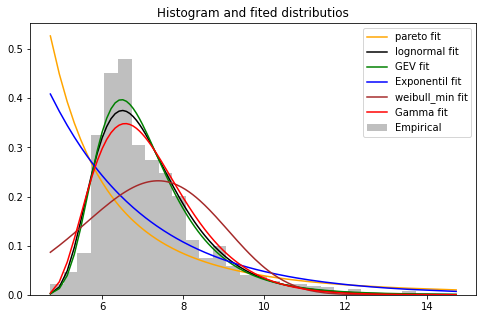

In [5]:
# import package 
import scipy.stats
from scipy.stats import pareto
from scipy.stats import genextreme as gev
from scipy.stats import genextreme
from scipy.stats import lognorm
from scipy.stats import expon
from scipy.stats import gumbel_r
from scipy.stats import genpareto
from scipy.stats import gamma
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
##################################################################################
# select a data set from df data set
##################################################################################

df1=df['DAT'] # using the DA fron data set
x=df1[0:1189]  # select the specific length for data
##################################################################################
# Histogram and fited distribution
##################################################################################
plt.figure(figsize=(8,5))
plt.hist(x, density=True, alpha=0.5, color="gray",  label="Empirical",bins=30)

shape, loc, scale=scipy.stats.pareto.fit(x)
p1,p2,p3=stats.lognorm.fit(x)
a,b,c =  stats.genextreme.fit(x)
e1,e2=stats.expon.fit(x)
shape1, loc1, scale1 = stats.weibull_min.fit(x, floc=0)
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(x)

plt.plot(x, pareto(shape, loc, scale).pdf(x),label="pareto fit",  color="orange")
plt.plot(x, lognorm(p1,p2,p3).pdf(x),label="lognormal fit",  color="black")
plt.plot(x, genextreme(a,b,c).pdf(x),label="GEV fit",  color="green")
plt.plot(x, expon(e1,e2).pdf(x),label="Exponentil fit",  color="blue")
plt.plot(x, weibull_min(shape1, loc1, scale1).pdf(x),label="weibull_min fit",  color="brown")
plt.plot(x, gamma(fit_alpha, fit_loc, fit_beta).pdf(x),label="Gamma fit",  color="red")

plt.title("Histogram and fited distributios")
plt.legend()


## **Empirical CDF**

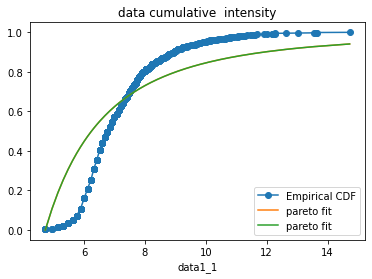

In [6]:
import statsmodels.distributions
ecdf = statsmodels.distributions.ECDF(x)

plt.plot(x, ecdf(x),"o-", label="Empirical CDF")
plt.plot(x, pareto(shape,loc,scale).cdf(x), label="pareto fit")
plt.plot(x, pareto(shape,loc,scale).cdf(x), label="pareto fit")

plt.title("data cumulative  intensity")
plt.xlabel("data1_1")
plt.legend()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


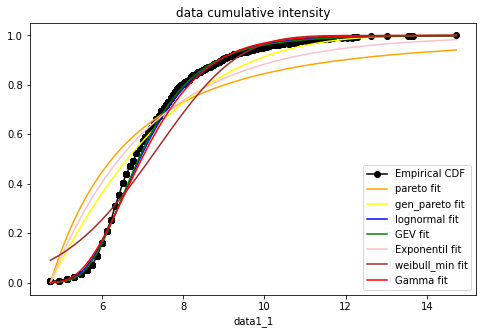

In [7]:
import statsmodels.distributions

ecdf = statsmodels.distributions.ECDF(x)

shape, loc, scale=scipy.stats.pareto.fit(x)
shapeg, locg, scaleg=scipy.stats.genpareto.fit(x)
p1,p2,p3=stats.lognorm.fit(x)
a,b,c =  stats.genextreme.fit(x)
e1,e2=stats.expon.fit(x)
shape1, loc1, scale1 = stats.weibull_min.fit(x, floc=0)
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(x)

plt.figure(figsize=(8,5))
plt.plot(x, ecdf(x), 'o-', label="Empirical CDF",  color="black")
plt.plot(x, pareto(shape, loc, scale).cdf(x),label="pareto fit",  color="orange")
plt.plot(x, genpareto(shapeg, locg, scaleg).cdf(x),label="gen_pareto fit",  color="yellow")
plt.plot(x, lognorm(p1,p2,p3).cdf(x),label="lognormal fit",  color="blue")
plt.plot(x, genextreme(a,b,c).cdf(x),label="GEV fit",  color="green")
plt.plot(x, expon(e1,e2).cdf(x),label="Exponentil fit",  color="pink")
plt.plot(x, weibull_min(shape1, loc1, scale1).cdf(x),label="weibull_min fit",  color="brown")
plt.plot(x, gamma(fit_alpha, fit_loc, fit_beta).cdf(x),label="Gamma fit",  color="red")

plt.title("data cumulative intensity")
plt.xlabel("data1_1")
plt.legend()

## **Kolmogorov Smirnov Test**

In [8]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
genpareto=st.genpareto
args_genpreto = genpareto.fit(x,f0=8)
print(args_genpreto)

(8, 4.728708044838117, 1.8379590470825486)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [ ]:
from scipy.stats import pareto
from scipy.stats import genpareto
from scipy.stats import genextreme as gev
from scipy.stats import genextreme
from scipy.stats import lognorm
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import weibull_min

# expon fit
expon = st.expon
args_ex = expon.fit(x)
# pareto fit
pareto = st.pareto
args_preto = pareto.fit(x)

genpareto=st.genpareto
args_genpreto = genpareto.fit(x)

#GEV fit
GEV=st.genextreme
args_GEV = genextreme.fit(x)
#lognormal fit
lognorm=st.lognorm
args_lognorm = lognorm.fit(x)
#gamma fit
gamma=st.gamma
args_gamma = gamma.fit(x)
# weibull_min fit
weibull_min=st.weibull_min
args_weibull_min = weibull_min.fit(x)

#
k_s_expon=st.kstest(x, expon.cdf, args_ex)
print("Exponential Distribution :     ","P1=",  round(args_ex[0],3),", P2=", round(args_ex[1],3),"                  ", "--- KstestResult:  ","statistic =",round(k_s_expon[0],3),",  pvalue =",round(k_s_expon[1],3))
k_s_pareto=st.kstest(x, pareto.cdf, args_preto)
print("Pareto Distribution :          ","P1=",  round(args_preto[0],3),", P2=", round(args_preto[1],3),", P3=", round(args_preto[2],3),"    ", "--- KstestResult:  ","statistic =",round(k_s_pareto[0],3),",  pvalue =",round(k_s_pareto[1],3))
k_s_genpareto=st.kstest(x, genpareto.cdf, args_genpreto)
print("Gen_Pareto Distribution :      ","P1=",  round(args_genpreto[0],3),", P2=", round(args_genpreto[1],3),", P3=", round(args_genpreto[2],3),"  ","--- KstestResult:  ","statistic =",round(k_s_genpareto[0],3),",  pvalue =",round(k_s_genpareto[1],3))
k_s_GEV=st.kstest(x, GEV.cdf, args_GEV)
print("GEV Distribution :             ","P1=",  round(args_GEV[0],3),", P2=", round(args_GEV[1],3),", P3=", round(args_GEV[2],3),"    ","--- KstestResult:  ","statistic =",round(k_s_GEV[0],3),",  pvalue =",round(k_s_GEV[1],3))
k_s_lognorm=st.kstest(x, lognorm.cdf, args_lognorm)
print("Lognormal Distribution :       ","P1=",  round(args_lognorm[0],3),", P2=", round(args_lognorm[1],3),", P3=", round(args_lognorm[2],3),"      ","--- KstestResult:  ","statistic =",round(k_s_lognorm[0],3),",  pvalue =",round(k_s_lognorm[1],3))
k_s_gamma=st.kstest(x, gamma.cdf, args_gamma)
print("Gamma Distribution :           ","P1=",  round(args_gamma[0],3),", P2=", round(args_gamma[1],3),", P3=", round(args_gamma[2],3),"     ","--- KstestResult:  ","statistic =",round(k_s_gamma[0],3),",  pvalue =",round(k_s_gamma[1],3))
k_s_weibull_min=st.kstest(x, weibull_min.cdf, args_weibull_min)
print("weibull_min Distribution :     ","P1=",  round(args_weibull_min[0],3),", P2=", round(args_weibull_min[1],3),", P3=", round(args_weibull_min[2],3),"       ","--- KstestResult:  ","statistic =",round(k_s_weibull_min[0],3),",  pvalue =",round(k_s_weibull_min[1],3))
print("")


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Exponential Distribution :      P1= 4.729 , P2= 2.448                    --- KstestResult:   statistic = 0.304 ,  pvalue = 0.0
Pareto Distribution :           P1= 2.5 , P2= -0.017 , P3= 4.745      --- KstestResult:   statistic = 0.348 ,  pvalue = 0.0
Gen_Pareto Distribution :       P1= -0.296 , P2= 4.728 , P3= 3.028    --- KstestResult:   statistic = 0.261 ,  pvalue = 0.0
GEV Distribution :              P1= -0.083 , P2= 6.555 , P3= 0.929      --- KstestResult:   statistic = 0.053 ,  pvalue = 0.002
Lognormal Distribution :        P1= 0.402 , P2= 4.059 , P3= 2.87        --- KstestResult:   statistic = 0.059 ,  pvalue = 0.0
Gamma Distribution :            P1= 4.409 , P2= 4.509 , P3= 0.605       --- KstestResult:   statistic = 0.069 ,  pvalue = 0.0
weibull_min Distribution :      P1= 0.683 , P2= 4.729 , P3= 1.052         --- KstestResult:   statistic = 0.584 ,  pvalue = 0.0



## **ProbPlot and Distribution Estimation**

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Pareto parameters:         (2.49977535550816, -0.016589287281291477, 4.7452973308507325)
Lognormal parameters:      (0.40171583115484155, 4.0590701649314225, 2.870126121102575)
GEV parameters:           (-0.08281345535599413, 6.555147558278136, 0.9292856546909816)
Exponential parameters:   (4.728708045, 2.4477233860269125)
4.776775473904636 0 7.7549507509421804
weibull_min parameters:   (4.776775473904636, 0, 7.7549507509421804)
Gamm parameters:         (4.40850489386328, 4.508633651151721, 0.6051500515126569)


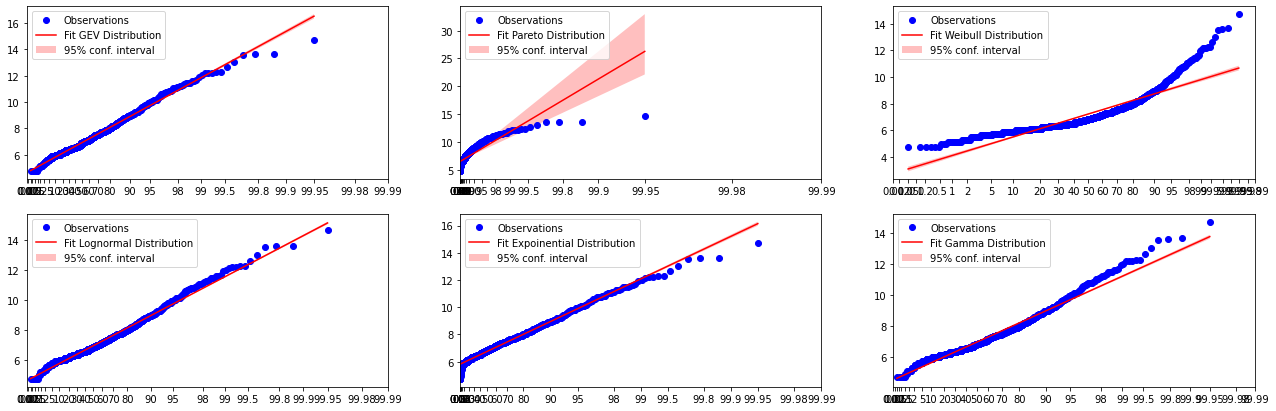

In [12]:
import matplotlib
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.stats import lognorm
import numpy
from matplotlib import pyplot
from scipy import stats
import probscale
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pareto
from scipy.stats import probplot, pareto
from scipy.stats import genextreme as gev
from scipy.stats import genextreme
from scipy.stats import probplot, weibull_min



fit_pareto=scipy.stats.pareto.fit(x)
shape, loc, scale=scipy.stats.pareto.fit(x)
pareto_dist=pareto(shape,loc,scale)
print("Pareto parameters:        ", fit_pareto)

fit_lognormal=stats.lognorm.fit(x)
p1,p2,p3=fit_lognormal=stats.lognorm.fit(x)
print("Lognormal parameters:     ", fit_lognormal)



fit_gev=scipy.stats.genextreme.fit(x)
a,b,c =  stats.genextreme.fit(x)
print("GEV parameters:          ",fit_gev)

fit_exp=stats.expon.fit(x)
e1,e2=stats.expon.fit(x)
print("Exponential parameters:  ",fit_exp)


fit_weib=stats.weibull_min.fit(x, floc=0)
shape1, loc1, scale1 = stats.weibull_min.fit(x, floc=0)
print(shape1, loc1, scale1)
print("weibull_min parameters:  ",fit_weib)

fit_gamma=stats.gamma.fit(x)
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(x)

print("Gamm parameters:        ",fit_gamma)

fig, axs = plt.subplots(2, 3, figsize=(22, 7))


fig = probscale.probplot(x,
    ax=axs[0,0],
    plottype='prob',
    bestfit=True,
    estimate_ci=True,
    dist=genextreme(a,b,c),
    line_kws={'label': 'Fit GEV Distribution', 'color': 'r'},
    scatter_kws={'label': 'Observations', 'color': 'b'}
)

fig = probscale.probplot(x,
    ax=axs[0,1],
    plottype='prob',
    bestfit=True,
    estimate_ci=True,
    dist=pareto(shape,loc,scale),
    line_kws={'label': 'Fit Pareto Distribution', 'color': 'r'},
    scatter_kws={'label': 'Observations', 'color': 'b'}
)

fig = probscale.probplot(x,
    ax=axs[1,0],
    plottype='prob',
    bestfit=True,
    estimate_ci=True,
    dist=lognorm(p1,p2,p3),
    line_kws={'label': 'Fit Lognormal Distribution', 'color': 'r'},
    scatter_kws={'label': 'Observations', 'color': 'b'}
)

fig = probscale.probplot(x,
    ax=axs[1,1],
    plottype='prob',
    bestfit=True,
    estimate_ci=True,
    dist=stats.expon(e1,e2),
    line_kws={'label': 'Fit Expoinential Distribution', 'color': 'r'},
    scatter_kws={'label': 'Observations', 'color': 'b'}
)

fig = probscale.probplot(x,
    ax=axs[0,2],
    plottype='prob',
    bestfit=True,
    estimate_ci=True,
    dist=stats.weibull_min(shape1, loc1, scale1 ),
    line_kws={'label': 'Fit Weibull Distribution', 'color': 'r'},
    scatter_kws={'label': 'Observations', 'color': 'b'}
)

fig = probscale.probplot(x,
    ax=axs[1,2],
    plottype='prob',
    bestfit=True,
    estimate_ci=True,
    dist=stats.gamma(fit_alpha, fit_loc, fit_beta ),
    line_kws={'label': 'Fit Gamma Distribution', 'color': 'r'},
    scatter_kws={'label': 'Observations', 'color': 'b'}
)

axs[0,0].legend(loc='upper left')
axs[0,1].legend(loc='upper left')
axs[1,0].legend(loc='upper left')
axs[1,1].legend(loc='upper left')
axs[0,2].legend(loc='upper left')
axs[1,2].legend(loc='upper left')

## **Define a loop to estimate parameters for a specific range of data**

In [13]:
from scipy.stats import pareto
from scipy.stats import genextreme as gev
from scipy.stats import genextreme
from scipy.stats import lognorm
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import weibull_min

######################################################################################################
######################################################################################################
#  define a function to create a spesific range of data between two number with  Float Numbers
def drange(start, stop, step):
    result = []
    value = start
    while value <= stop:
        result.append(round(value,1))
        value += step
    return result

Threshold=drange(5,9,0.1)

######################################################################################################
######################################################################################################

results = []
for i in drange(6.1, 9, 0.1):
    y = [x for x in x if (x > i)]  # change the data 
    param = pareto.fit(y) #pareto ditibution fit
    results.append((round(i,2),round(param[0],4),round(param[1],4),round(param[2],4)))
    
    
for j in results:
    print("{}:         Parm1=   {} ,     Pamr2=   {} ,     Parm3=   {}     ".format(j[0], j[1], j[2],j[3]))


######################################################################################################
######################################################################################################


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


6.1:         Parm1=   5.4752 ,     Pamr2=   -0.0426 ,     Parm3=   6.1595     
6.2:         Parm1=   6.1036 ,     Pamr2=   -0.6117 ,     Parm3=   6.835     
6.3:         Parm1=   5.8666 ,     Pamr2=   -0.0618 ,     Parm3=   6.3863     
6.4:         Parm1=   5.8762 ,     Pamr2=   -0.0539 ,     Parm3=   6.4751     
6.5:         Parm1=   5.96 ,     Pamr2=   -0.0532 ,     Parm3=   6.5668     
6.6:         Parm1=   5.9997 ,     Pamr2=   -0.1287 ,     Parm3=   6.7309     
6.7:         Parm1=   6.0591 ,     Pamr2=   0.0111 ,     Parm3=   6.7583     
6.8:         Parm1=   6.2215 ,     Pamr2=   -0.0053 ,     Parm3=   6.854     
6.9:         Parm1=   6.2787 ,     Pamr2=   -0.0039 ,     Parm3=   6.9291     
7.0:         Parm1=   6.4462 ,     Pamr2=   -0.0592 ,     Parm3=   7.1303     
7.1:         Parm1=   6.5856 ,     Pamr2=   -0.0543 ,     Parm3=   7.195     
7.2:         Parm1=   6.662 ,     Pamr2=   -0.0661 ,     Parm3=   7.2745     
7.3:         Parm1=   6.7677 ,     Pamr2=   0.0082 ,     Pa

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


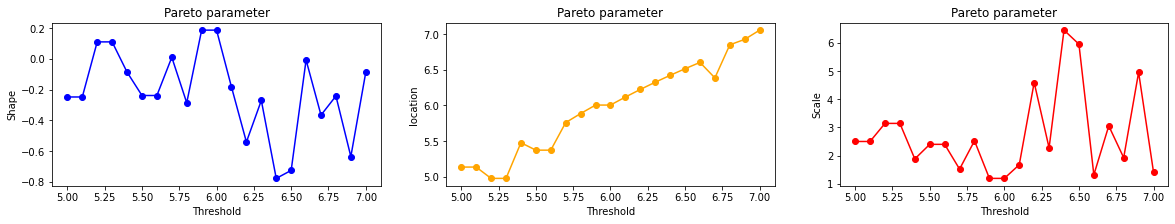

In [15]:
from scipy.stats import pareto
from scipy.stats import genextreme as gev
from scipy.stats import genextreme
from scipy.stats import lognorm
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import weibull_min

######################################################################################################
######################################################################################################
#  define a function to create a spesific range of data between two number with  Float Numbers
def range_with_floats(start, stop, step):
    # Works only with positive float numbers!
    while stop >= start:
        yield start
        start += step

######################################################################################################
######################################################################################################

Threshold = []
for i in range_with_floats(5, 7, 0.1):# change the threshold
    y = [x for x in x if (x > i)]   
    param = genpareto.fit(y) #pareto ditibution fit
    Threshold.append((round(i,2)))
    
P1 = []
for i in range_with_floats(5, 7, 0.1): # change the threshold
    y = [x for x in x if (x > i)]   
    param = genpareto.fit(y) #pareto ditibution fit
    P1.append((round(param[0],4)))
P2 = []
for i in range_with_floats(5, 7, 0.1):# change the threshold
    y = [x for x in x if (x > i)]  
    param = genpareto.fit(y) #pareto ditibution fit
    P2.append((round(param[1],4)))

P3 = []
for i in range_with_floats(5, 7, 0.1):
    y = [x for x in x if (x > i)]  # change the data 
    param = genpareto.fit(y) #pareto ditibution fit
    P3.append((round(param[2],4)))

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 3))

ax1.plot(Threshold,P1, "o-", label="parameter1",  color="b")
ax1.set_title("Pareto parameter")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Shape")

ax2.plot(Threshold,P2, "o-", label="parameter1",  color="orange")
ax2.set_title("Pareto parameter")
ax2.set_xlabel("Threshold")
ax2.set_ylabel("location")

ax3.plot(Threshold,P3, "o-", label="parameter1",  color="red")
ax3.set_title("Pareto parameter")
ax3.set_xlabel("Threshold")
ax3.set_ylabel("Scale")
plt.show()


######################################################################################################
######################################################################################################

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Pareto Distribution :           P1= 5.289 , P2= -0.05 , P3= 6.055      --- KstestResult:   statistic = 0.077 ,  pvalue = 0.0
Gen_Pareto Distribution :       P1= 0.188 , P2= 6.005 , P3= 1.195    --- KstestResult:   statistic = 0.069 ,  pvalue = 0.0
GEV Distribution :              P1= -0.398 , P2= 6.661 , P3= 0.665      --- KstestResult:   statistic = 0.055 ,  pvalue = 0.003


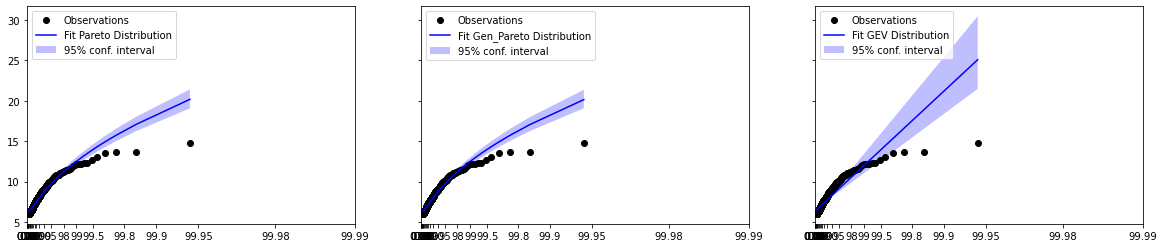

In [16]:
# Fit distribution for a specific length for data and KS test and Prob Plot
y = [x for x in x if (x > 6)]

# pareto fit
pareto = st.pareto
args_preto =pareto.fit(y)
p1,p2,p3 =pareto.fit(y)
#gen_pareto
genpareto=st.genpareto
args_genpreto=genpareto.fit(y)
a1,a2,a3 = genpareto.fit(y)
#GEV
GEV=st.genextreme
args_GEV =genextreme.fit(y)
b1,b2,b3= genextreme.fit(y)

k_s_pareto=st.kstest(y, pareto.cdf, args_preto)
k_s_genpareto=st.kstest(y, genpareto.cdf, args_genpreto)
k_s_GEV=st.kstest(y, GEV.cdf, args_GEV)
print("Pareto Distribution :          ","P1=",  round(args_preto[0],3),", P2=", round(args_preto[1],3),", P3=", round(args_preto[2],3),"    ", "--- KstestResult:  ","statistic =",round(k_s_pareto[0],3),",  pvalue =",round(k_s_pareto[1],3))
print("Gen_Pareto Distribution :      ","P1=",  round(args_genpreto[0],3),", P2=", round(args_genpreto[1],3),", P3=", round(args_genpreto[2],3),"  ","--- KstestResult:  ","statistic =",round(k_s_genpareto[0],3),",  pvalue =",round(k_s_genpareto[1],3))
print("GEV Distribution :             ","P1=",  round(args_GEV[0],3),", P2=", round(args_GEV[1],3),", P3=", round(args_GEV[2],3),"    ","--- KstestResult:  ","statistic =",round(k_s_GEV[0],3),",  pvalue =",round(k_s_GEV[1],3))

fig, (ax1, ax2, ax3)= pyplot.subplots(figsize=(20, 4), ncols=3,
                                       sharey=True, sharex=True)
fig = probscale.probplot(y,ax=ax1,plottype='prob', bestfit=True, estimate_ci=True,
    dist=pareto(p1,p2,p3),
    line_kws={'label': 'Fit Pareto Distribution', 'color': 'b'},
    scatter_kws={'label': 'Observations', 'color': 'black'}   )

fig = probscale.probplot(y,ax=ax2,plottype='prob', bestfit=True, estimate_ci=True,
    dist=genpareto(a1,a2,a3),
    line_kws={'label': 'Fit Gen_Pareto Distribution', 'color': 'b'},
    scatter_kws={'label': 'Observations', 'color': 'black'}  )

fig = probscale.probplot(y,ax=ax3,plottype='prob', bestfit=True, estimate_ci=True,
    dist=genextreme(b1,b2,b3),
    line_kws={'label': 'Fit GEV Distribution', 'color': 'b'},
    scatter_kws={'label': 'Observations', 'color': 'black'}  )

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

In [24]:
pip install fitter

In [25]:
import os
import random
import warnings
import numpy as np
from scipy import stats
from fitter import Fitter
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *



In [26]:
### difine a function for bootstraping CI ###

def bootstrap_ci(
    data, 
    statfunction=np.average, 
    alpha = 0.05, 
    n_samples = 100):


    def bootstrap_ids(data, n_samples=100):
        for _ in range(n_samples):
            yield np.random.randint(data.shape[0], size=(data.shape[0],))    
    
    alphas = np.array([alpha/2, 1 - alpha/2])
    nvals = np.round((n_samples - 1) * alphas).astype(int)
    if np.any(nvals < 10) or np.any(nvals >= n_samples-10):
        warnings.warn("Some values used extremal samples; results are probably unstable. "
                      "Try to increase n_samples")

    data = np.array(data)
    if np.prod(data.shape) != max(data.shape):
        raise ValueError("Data must be 1D")
    data = data.ravel()
    
    boot_indexes = bootstrap_ids(data, n_samples)
    stat = np.asarray([statfunction(data[_ids]) for _ids in boot_indexes])
    stat.sort(axis=0)

    return stat[nvals]

In [27]:
### select distribution for extreme value ###

f = Fitter(x, distributions=['genextreme','gumbel_r','pareto','genpareto','gamma' ], bins=20)
f.fit()

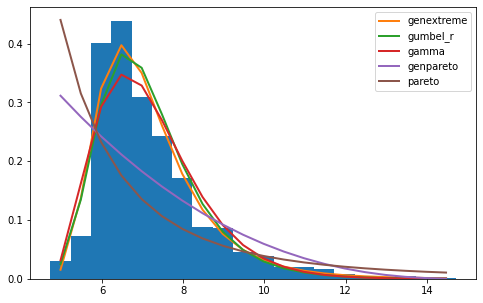

In [30]:
### Histogram ###

plt.figure(figsize=(8,5))

f.summary()
plt.grid(False)

In [31]:
best_dist = eval(f"stats.{list(f.get_best().keys())[0]}")
f.get_best()

{'genextreme': {'c': -0.08281345535599413,
  'loc': 6.555147558278136,
  'scale': 0.9292856546909816}}

In [33]:
### Parameter estimation for best fit model ###

best_params = best_dist.fit(x)
best_params

(-0.08281345535599413, 6.555147558278136, 0.9292856546909816)

In [34]:
###  bootstrap intervals for best model ###

np.random.seed(111)
ci_params = bootstrap_ci(x, best_dist.fit, n_samples=100)
ci_params

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Some values used extremal samples; results are probably unstable. Try to increase n_samples


array([[-0.11644059,  6.50344217,  0.87570826],
       [-0.03909677,  6.62146842,  0.98949009]])

In [35]:
###  define return periods and return values
eps = 1e-1
T = np.arange(1, 1000, eps) + eps # return periods
q = 1-1/T
ppf = best_dist.ppf(q, *best_params) # return values

In [36]:
### bootstrap intervals for return values
def gen_ppf(data, q):
    
    new_param = best_dist.fit(data)
    ppf = best_dist.ppf(q, *new_param)
    
    return ppf

np.random.seed(111)
ci_ppf = bootstrap_ci(x, lambda x: gen_ppf(x, q), n_samples=100, alpha=0.05)
ci_ppf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Some values used extremal samples; results are probably unstable. Try to increase n_samples


array([[ 5.7216337 ,  5.97651194,  6.15111255, ..., 13.89328948,
        13.89341362, 13.89353775],
       [ 5.83660942,  6.08557566,  6.27383173, ..., 16.37316186,
        16.37336914, 16.3735764 ]])

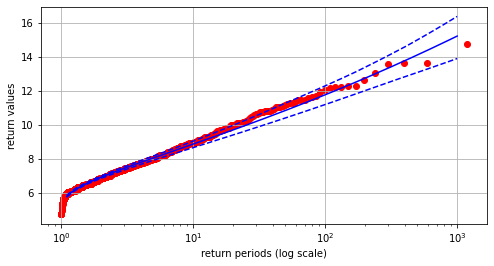

In [38]:
### Return value plot ###

plt.figure(figsize=(8,4))

plt.semilogx(T, ppf, c='blue')
plt.semilogx(T, ci_ppf[0], c='blue', linestyle='--')
plt.semilogx(T, ci_ppf[1], c='blue', linestyle='--')

N = np.arange(1, len(x)+1)
plt.scatter(N[-1]/N, sorted(x)[::-1], color = 'red')
plt.ylabel('return values'); plt.xlabel('return periods (log scale)')
plt.grid()

In [41]:
### Summary for specific retun period ###

eps = 1e-1
T = np.asarray([1, 2, 5, 10, 25, 50, 100]) + eps
q = 1-1/T
ppf = best_dist.ppf(q, *best_params)

np.random.seed(111)
ci_ppf = bootstrap_ci(x, lambda x: gen_ppf(x, q), n_samples=500, alpha=0.05)

summary = pd.DataFrame({
    'return_period':(T-eps).astype(int),
    'low_ci':ci_ppf[0], 
    'return_value':ppf, 
    'up_ci':ci_ppf[-1]
}).set_index('return_period')

summary

,low_ci,return_value,up_ci
return_period,,,
1,5.718447,5.771137,5.836609
2,6.899259,6.967706,7.038689
5,7.947123,8.062625,8.182391
10,8.699170,8.865685,9.048900
25,9.711984,9.963283,10.248491
50,10.491827,10.838144,11.227717
100,11.252884,11.759675,12.299335
